# Домашнее задание №3

<span style="color: red; font-size: 14pt">Дедлайн: 20 марта 23:59</span>

Машинное обучение, ФИВТ, Весна 2018

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall <номер_группы> <фамилия>``, к примеру -- ``ML2018_fall 596 ivanov``
- Выполненное дз сохраните в файл ``ML2018_<фамилия>_<группа>_task<номер задания>.ipnb``, к примеру -- ``ML2018_ivanov_596_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com`` (или в телеграм-канал)
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``

--------
- **PS1**: Используются автоматические фильтры, мы не найдем ваше дз, если вы укажете тему письма в неправильном формате.
- **PS2**: Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре

## Часть 1. Теоретические задачи

##### 30% баллов за задание, оценочное время выполнения 30 минут

### Задача 1 (10% баллов)

Предположим, что мы решаем задачу бинарной классификации и что у нас есть три алгоритма $b_1(x)$, $b_2(x)$ и $b_3(x)$, каждый из которых ошибается с вероятностью p. Мы строим композицию взвешенным голосованием: алгоритмам присвоены значимости $w_1$, $w_2$ и $w_3$, и для вынесения вердикта суммируются значимости алгоритмов, проголосовавших за каждый из классов:

$$a_0 = \sum_{i=1}^3 w_i [b_i(x)=0]$$
$$a_1 = \sum_{i=1}^3 w_i [b_i(x)=1]$$


Объект $x$ относится к классу, для которого такая сумма оказалась максимальной. Например, если первые два алгоритма голосуют за класс $0$, а третий — за класс $1$, то выбирается класс $0$, если $w_1 + w_2 > w_3$, и класс $1$ в противном случае. Какова вероятность ошибки такой композиции этих трех алгоритмов, если:
1. $w_1 = 0.2, w_2 = 0.3, w_3 = 0.2$;
2. $w_1 = 0.2, w_2 = 0.5, w_3 = 0.2$? 

In [ ]:
# Ваш ответ здесь

### Задача 2 (10% баллов)

Рассмотрим задачу бинарной классификации. Будем считать, что все алгоритмы из базового семейства возвращают ответы из отрезка $[0,1]$, которые можно интерпретировать как вероятности принадлежности объектов классу $1$. В качестве функции потерь возьмем отрицательный логарифм правдоподобия:
$$L(y,z) = -(y \log{z}+(1-y)\log{(1-z)})$$
В формуле $y$ - правильный ответ, $z$ - ответ алгоритма. Выпишите формулы для поиска базовых алгоритмов $b_n$ и коэффициентов $\gamma_n$ в градиентном бустинге.

In [ ]:
# Ваш ответ здесь

### Задача 3 (10% баллов)

Известно, что на $n$-й итерации двухклассового метода AdaBoost
был выбран базовый классификатор, допускающий ошибку только на одном объекте $x_j$. Найдите нормированный вес $w_j^{(n+1)}$ при этом объекте на следующей итерации.

In [ ]:
# Ваш ответ здесь

## Часть 2. Random Forest

##### 70% баллов за задание, оценочное время выполнения 3 часа

### Реализация (40%)

**Необходимо реализовать класс `RandomForest`** (для решения задачи классификации)

**Спецификация:**
- класс наследуется от `sklearn.BaseEstimator`;
- конструктор содержит следующие параметры: 
    - `num_trees` - количество деревьев в лесе;
    - `max_depth` - максимальная глубина дерева (по умолчанию - `numpy.inf`); 
    - `max_features` - количество признаков, принимаемое к рассмотрению при разбиении (аналогичный параметр есть в sklearn имплементации). Параметр может принимать значения:
        - int - тогда рассматриваем max_features признаков при каждом разбиении;
        - float - max_features обозначает процент, int(max_features * n_features) признаков рассматривается при каждом разбиении;
        - “sqrt” - max_features=sqrt(n_features);
        - “log2” - max_features=log2(n_features);
        - None - max_features=n_features;
    - `criterion` - критерий разбиения (для классификации - 'gini' или 'entropy', по умолчанию - 'gini'); функции с подсчетом энтропийного и критерия Джини можно взять из предыдущего дз;
    
- класс имеет методы `fit` и `predict`;
- метод `fit` принимает матрицу объектов `X` и вектор ответов `y` (объекты `numpy.ndarray`) и возвращает экземпляр класса
    `RandomForest`, представляющий собой Random Forest, обученный по выборке `(X, y)` с учётом заданных в конструкторе параметров; 
- метод `predict` принимает матрицу объектов и возвращает вектор предсказанных ответов;

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.base import BaseEstimator, ClassifierMixin
import numpy as np

In [6]:
def bagging(X, y, size):
    #Implement random sampling here
    ind = np.random.choice(size, size=size, replace=True)
    sample_X, sample_y = X[ind], y[ind]
    return sample_X, sample_y

In [36]:
class RandomForest(BaseEstimator, ClassifierMixin):
    def __init__(self, num_trees, max_depth=None, max_features=None, criterion='gini'):
        self.num_trees = num_trees
        self.max_depth = max_depth
        self.max_features = max_features
        self.criterion = criterion
        self.trees = []
    
    def fit(self, X_train, y_train):
        '''
        Create trees here, using bagging and RSM.
        '''
        for i in range(self.num_trees):
            sample_X, sample_y = bagging(X_train, y_train, y_train.shape[0])
            tree = DecisionTreeClassifier(criterion=self.criterion,
                                         max_depth=self.max_depth,
                                         max_features=self.max_features)
            tree.fit(sample_X, sample_y)
            self.trees.append(tree)
        return self
    
    def predict(self, X_test):
        '''
        Predict the label here using your grown trees.
        '''
        y_pred = np.zeros(X_test.shape[0])
        predictions = np.ndarray((self.num_trees, X_test.shape[0]))
        for i in range(self.num_trees):
            predictions[i] = self.trees[i].predict(X_test)
        for i in range(X_test.shape[0]):
            y_pred[i] = np.argmax(np.bincount(np.int64(predictions[:,i])))
        return y_pred

### Тестирование (15%)

Загрузите датасет Wine Data Set (https://archive.ics.uci.edu/ml/datasets/wine). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Попробуйте обучить Random Forest на предложенном датасете

In [9]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
columns = ("""target Alcohol MalicAcid Ash AlcalinityOfAsh Magnesium TotalPhenols 
           Flavanoids NonflavanoidPhenols Proanthocyanins ColorIntensity 
           Hue OD280/OD315OfDilutedWines Proline""")
df.columns = columns.split()

In [28]:
from sklearn import preprocessing, model_selection
from sklearn.utils import shuffle
def number_encode_features(init_df):
    result = init_df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

encoded_data, encoders = number_encode_features(df)
data = shuffle(encoded_data.values)
# Get Data
test_size = 0.2
random_state = 42
train , test = model_selection.train_test_split(data, test_size = test_size, random_state = random_state)

X_test, y_test = test[:,1:], test[:,0]
X_train, y_train = train[:,1:], train[:,0]

In [52]:
from sklearn import metrics
clf = RandomForest(num_trees=1)
clf.fit(X_train, y_train)
print("Точность на тесте: ", metrics.accuracy_score(y_test, clf.predict(X_test)))
print("Точность на обучении: ", metrics.accuracy_score(y_train, clf.predict(X_train)))

Точность на тесте:  1.0
Точность на обучении:  0.9647887323943662


Покажите, как менялись значения критерия качества `accuracy` при увеличении параметра num_trees. Видны ли следы переобучения?

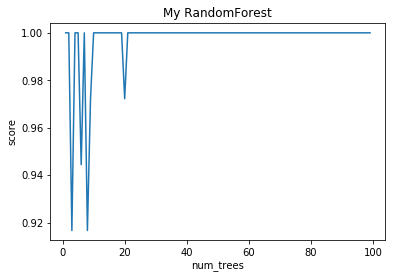

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline
scores = []
num_trees = 100
for i in range(1, num_trees):
    clf = RandomForest(num_trees=i)
    clf.fit(X_train, y_train)
    scores.append(metrics.accuracy_score(y_test, clf.predict(X_test)))
plt.title("My RandomForest")
plt.xlabel("num_trees")
plt.ylabel("score")
plt.plot(range(1, num_trees), scores)
plt.show()

Сравните качество работы вашей реализации RandomForest и реализации из sklearn.

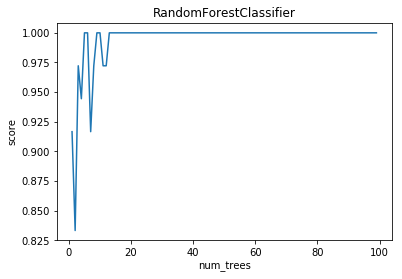

In [63]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
scores = []
num_trees = 100
for i in range(1, num_trees):
    clf = RandomForestClassifier(n_estimators=i)
    clf.fit(X_train, y_train)
    scores.append(metrics.accuracy_score(y_test, clf.predict(X_test)))
plt.title("RandomForestClassifier")
plt.xlabel("num_trees")
plt.ylabel("score")
plt.plot(range(1, num_trees), scores)
plt.show()

### Модификация Random Forest (15%)

Измените свою реализацию `RandomForest` так, чтобы случайное подмножество признаков выбиралось не в каждом сплите, а перед построением всего дерева. Сравните результат работы с обычным RandomForest.

In [ ]:
# YOUR CODE HERE